In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import scipy.stats as stats
import numpy as np

In [2]:
# Load the dataset
data = pd.read_csv("/Users/tanjina/Desktop/New-readings/output-with-sleep-power-reading/client/analysis/per_conv_layer_energy_consumption_execution_time_sleep_3s_stdv_30_runs.csv")
# display first few rows
# print(data.head())

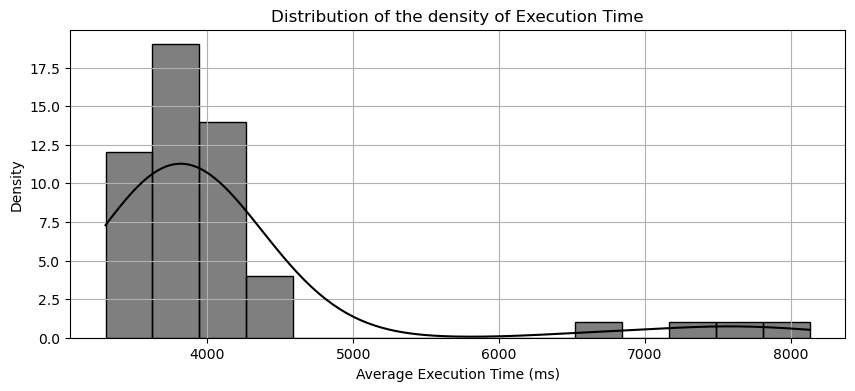

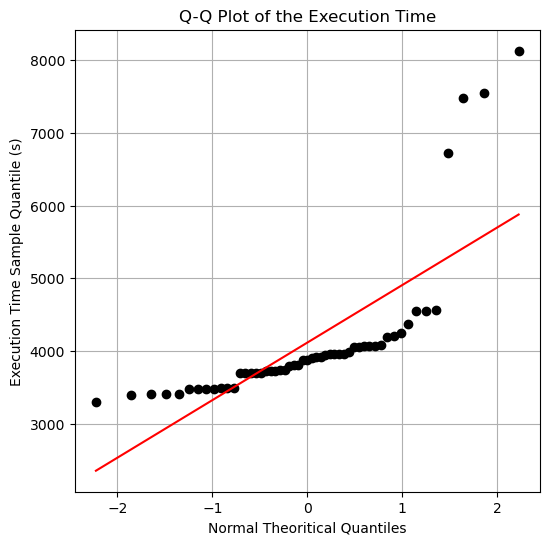

Shapiro-Wilk Test for Execution Time: W=0.5783, p=0.0000


In [3]:
# Normality check
# density plot of the distribution of Execution Time
plt.figure(figsize=(10, 4))
sns.histplot(data['avg_execution_time_ms'], kde=True, bins=15, color='black')
plt.title('Distribution of the density of Execution Time')
plt.xlabel('Average Execution Time (ms)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Q-Q Plot for Execution Time
plt.figure(figsize=(6, 6))
stats.probplot(data['avg_execution_time_ms'], dist="norm", plot=plt)
plt.gca().get_lines()[0].set_markerfacecolor("black")  # Change color of data points with customized color
plt.gca().get_lines()[0].set_markeredgecolor("black")  # Optional: Change edge color with customized color
plt.title("Q-Q Plot of the Execution Time")
plt.xlabel('Normal Theoritical Quantiles')
plt.ylabel('Execution Time Sample Quantile (s)')
plt.grid(True)
plt.show()

# Shapiro-Wilk test for Execution Time
shapiro_exec = stats.shapiro(data['avg_execution_time_ms'])
print(f"Shapiro-Wilk Test for Execution Time: W={shapiro_exec.statistic:.4f}, p={shapiro_exec.pvalue:.4f}")

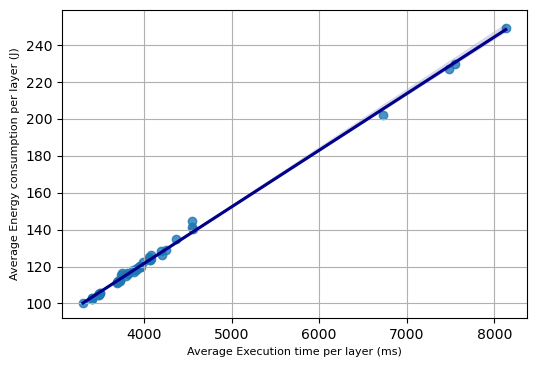

Pearson correlation coefficient: 0.9990, p-value: 0.0000
Spearman Correlation coefficient: 0.9952, p-value: 0.0000
R² (Coefficient of Determination): 0.9980


In [4]:
# Visualize the relationship between Energy consumption and Execution time
plt.figure(figsize=(6, 4))
sns.regplot(x=data['avg_execution_time_ms'], y=data['avg_energy_consumption'], line_kws={'color': 'darkblue'})

# plt.title('Scatter Plot: Energy Consumption vs. Execution Time', fontsize=10)
plt.xlabel('Average Execution time per layer (ms)', fontsize=8)
plt.ylabel('Average Energy consumption per layer (J)', fontsize=8)
plt.grid(True)
plt.show()

# calculate the Pearson correlation coefficient
# for checking linear relationship
pearson_correlation, pearson_p = pearsonr(data['avg_energy_consumption'], data['avg_execution_time_ms'])
print(f"Pearson correlation coefficient: {pearson_correlation:.4f}, p-value: {pearson_p:.4f}")

# calculate the Spearman's Rank Correlation
# when data doesn't show a normal distribution
spearman_correlation, spearman_p = stats.spearmanr(data['avg_energy_consumption'], data['avg_execution_time_ms'])
print(f"Spearman Correlation coefficient: {spearman_correlation:.4f}, p-value: {spearman_p:.4f}")

from sklearn.linear_model import LinearRegression

# Reshape for regression
X = np.array(data['avg_execution_time_ms']).reshape(-1, 1)
Y = np.array(data['avg_energy_consumption'])

# Fit linear regression model
model_ln = LinearRegression()
model_ln.fit(X, Y)
Y_predic_ln = model_ln.predict(X)

# Compute R²
r_squared = model_ln.score(X, Y)
print(f"R² (Coefficient of Determination): {r_squared:.4f}")